In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_excel('Participanta_Data_Used_Cars/Data_Train.xlsx')


FileNotFoundError: [Errno 2] No such file or directory: 'Participanta_Data_Used_Cars/Data_Train.xlsx'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')
X = dataset.iloc[:,:-1].values
Y = dataset.loc[:,'price']


KeyError: 'the label [price] is not in the [columns]'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')
X = dataset.iloc[:,:-1].values
Y = dataset.loc[:,'Price']


In [5]:
from sklearn.preprocessing import Imputer
new_price_imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)
new_price_imputer = new_price_imputer.fit(X[:,11])

C:\Users\karthikn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: could not convert string to float: '8.61 Lakh'

In [6]:
pure_X = new_price_imputer.transform(X[:11])

NotFittedError: This Imputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [7]:
X[:11] = new_price_imputer.transform(X[:11])

NotFittedError: This Imputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [8]:
dataset['Mileage'] = dataset['Mileage'].str.replace(' kmpl','')

In [9]:
dataset['Mileage'] = dataset['Mileage'].str.replace(' kmpl','').to_numeric()

AttributeError: 'Series' object has no attribute 'to_numeric'

In [10]:
dataset['Mileage'] = dataset['Mileage'].str.replace(' kmpl','')
dataset['Mileage'] = pd.to_numeric(dataset['Mileage'].str.replace(' km/kg',''))


In [11]:
dataset['Engine'] = pd.to_numeric(dataset['Engine'].str.replace(' CC',''))
dataset['Power'] = pd.to_numeric(dataset['Power'].str.replace(' bhp',''))

str_New_Price = dataset['New_Price'].str
dataset['New_Price'] = np.where(str_New_Price.contains('Cr'), pd.to_numeric(str_New_Price.replace(' Cr','')).apply(lambda x:x*100), pd.to_numeric(str_New_Price.replace(' Lakh',''))) 


ValueError: Unable to parse string "null" at position 76

In [12]:
dataset['Power'] = pd.to_numeric(dataset['Power'].str.replace(' bhp',''), errors='coerce')

In [13]:
str_New_Price = dataset['New_Price'].str
dataset['New_Price'] = np.where(str_New_Price.contains('Cr'), pd.to_numeric(str_New_Price.replace(' Cr','')).apply(lambda x:x*100), pd.to_numeric(str_New_Price.replace(' Lakh',''))) 


ValueError: Unable to parse string "8.61 Lakh" at position 2

In [14]:
dataset['New_Price'] = np.where(str_New_Price.contains('Cr'), str_New_Price.replace(' Cr','').apply(lambda x:pd.to_numeric(x)*100), str_New_Price.replace(' Lakh','')) 

ValueError: Unable to parse string "8.61 Lakh" at position 0

In [15]:
def get_Price(val):
    if val.contains(' Cr'):
        return val.replace(' Cr','') * 100
    else:
        return val.replace(' Lakh','')


In [16]:
dataset['New_Price'] = str_New_Price.applyMap(get_Price)

AttributeError: 'StringMethods' object has no attribute 'applyMap'

In [17]:
dataset['New_Price'] = dataset['New_Price'].applyMap(get_Price)

AttributeError: 'Series' object has no attribute 'applyMap'

In [18]:
dataset['New_Price'] = dataset['New_Price'].apply(get_Price)

AttributeError: 'float' object has no attribute 'contains'

In [19]:
dataset['New_Price'] = dataset['New_Price'].apply(get_Price, axis=1)

TypeError: get_Price() got an unexpected keyword argument 'axis'

In [20]:
dataset['New_Price'] = dataset['New_Price'].apply(get_Price)

AttributeError: 'float' object has no attribute 'contains'

In [21]:
dataset['New_Price'] = str_New_Price.apply(get_Price)

AttributeError: 'StringMethods' object has no attribute 'apply'

In [22]:
dataset = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')

In [23]:
def get_Price(val):
    if val.contains(' Cr'):
        return val.str.replace(' Cr','') * 100
    else:
        return val.replace(' Lakh','')

In [24]:
dataset['New_Price'] = dataset['New_Price'].apply(get_Price)

AttributeError: 'float' object has no attribute 'contains'

In [25]:
print(dataset.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object


In [26]:
def get_Price(val):
    if type(val) is str:
        if val.contains(' Cr'):
            return val.str.replace(' Cr','') * 100
        else:
            return val.replace(' Lakh','')
    else:
        return val

In [27]:
dataset['New_Price'] = dataset['New_Price'].apply(get_Price)

AttributeError: 'str' object has no attribute 'contains'

In [28]:
def get_Price(val):
    if type(val) is str:
        if ' Cr' in val:
            return val.replace(' Cr','') * 100
        else:
            return val.replace(' Lakh','')
    else:
        return val

In [29]:
dataset['New_Price'] = dataset['New_Price'].apply(get_Price)

In [30]:
def get_Price(val):
    if type(val) is str:
        if ' Cr' in val:
            return Decimal(val.replace(' Cr','')) * 100
        else:
            return Decimal(val.replace(' Lakh',''))
    else:
        return Decimal(val)

In [31]:
dataset['New_Price'] = dataset['New_Price'].apply(get_Price)

NameError: name 'Decimal' is not defined

In [32]:
def get_Price(val):
    if type(val) is str:
        if ' Cr' in val:
            return float(val.replace(' Cr','')) * 100
        else:
            return float(val.replace(' Lakh',''))
    else:
        return val

In [33]:
dataset['New_Price'] = dataset['New_Price'].apply(get_Price)

ValueError: could not convert string to float: '1.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.281.28'

In [34]:
dataset = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')

In [35]:
dataset['New_Price'] = dataset['New_Price'].apply(get_Price)

In [36]:
dataset['Mileage'] = dataset['Mileage'].str.replace(' kmpl','')
dataset['Mileage'] = pd.to_numeric(dataset['Mileage'].str.replace(' km/kg',''))

dataset['Engine'] = pd.to_numeric(dataset['Engine'].str.replace(' CC',''))
dataset['Power'] = pd.to_numeric(dataset['Power'].str.replace(' bhp',''), errors='coerce')


In [37]:
print(dataset.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object


In [38]:
X = dataset.iloc[:,:-1].values
Y = dataset.loc[:,'Price']

In [39]:
from sklearn.preprocessing import Imputer
new_price_imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)
new_price_imputer = new_price_imputer.fit(X[:,11])
X[:11] = new_price_imputer.transform(X[:11])

C:\Users\karthikn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[ nan  nan 8.61 ...  nan  nan  nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
from sklearn.preprocessing import Imputer
new_price_imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)
new_price_imputer = new_price_imputer.fit(X[:,11])
X[:,11] = new_price_imputer.transform(X[:,11])


C:\Users\karthikn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[ nan  nan 8.61 ...  nan  nan  nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
X[:,11]

array([nan, nan, 8.61, ..., nan, nan, nan], dtype=object)

In [42]:
X[:,10:11]

array([[5.0],
       [5.0],
       [5.0],
       ...,
       [8.0],
       [5.0],
       [5.0]], dtype=object)

In [43]:
X[:,11:12]

array([[nan],
       [nan],
       [8.61],
       ...,
       [nan],
       [nan],
       [nan]], dtype=object)

In [44]:
from sklearn.preprocessing import Imputer
new_price_imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)
new_price_imputer = new_price_imputer.fit(X[:,11:12])
X[:,11:12] = new_price_imputer.transform(X[:,11:12])

C:\Users\karthikn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
testset = pd.read_excel('Participants_Data_Used_Cars/Data_Test.xlsx')

In [46]:
original_dataset = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')

In [47]:
type(X)

numpy.ndarray

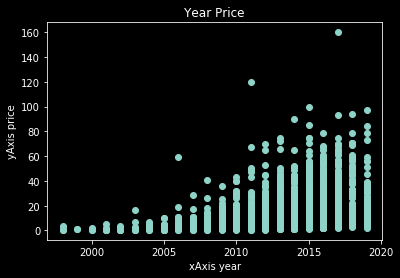

In [48]:
plt.scatter(dataset['Year'],dataset['Price'])
plt.title('Year Price')
plt.xlabel('xAxis year')
plt.ylabel('yAxis price')
plt.show()

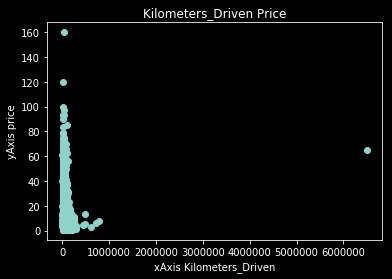

In [49]:
plt.scatter(dataset['Kilometers_Driven'],dataset['Price'])
plt.title('Kilometers_Driven Price')
plt.xlabel('xAxis Kilometers_Driven')
plt.ylabel('yAxis price')
plt.show()

In [50]:
dataset['Kilometers-Driven'] > 200000

KeyError: 'Kilometers-Driven'

In [51]:
dataset['Kilometers_Driven'] > 200000

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
5989    False
5990    False
5991    False
5992    False
5993    False
5994    False
5995    False
5996    False
5997    False
5998    False
5999    False
6000    False
6001    False
6002    False
6003    False
6004    False
6005    False
6006    False
6007    False
6008    False
6009    False
6010    False
6011    False
6012    False
6013    False
6014    False
6015    False
6016    False
6017    False
6018    False
Name: Kilometers_Driven, Length: 6019, dtype: bool

In [52]:
temp = dataset['Kilometers_Driven'] > 200000
print(temp)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
5989    False
5990    False
5991    False
5992    False
5993    False
5994    False
5995    False
5996    False
5997    False
5998    False
5999    False
6000    False
6001    False
6002    False
6003    False
6004    False
6005    False
6006    False
6007    False
6008    False
6009    False
6010    False
6011    False
6012    False
6013    False
6014    False
6015    False
6016    False
6017    False
6018    False
Name: Kilometers_Driven, Length: 6019, dtype: bool


In [53]:
dataset.loc(dataset['Kilometers_Driven'] > 200000)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [54]:
dataframe.loc(dataframe['Kilometers_Driven'] > 200000)

NameError: name 'dataframe' is not defined

In [55]:
dataframe = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')

In [56]:
dataset.loc(dataset['Kilometers_Driven'] > 200000)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [57]:
dataframe.loc(dataframe['Kilometers_Driven'] > 200000)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [58]:
dataframe.loc[dataframe['Kilometers_Driven'] > 200000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,4.00
77,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.4 kmpl,1998 CC,132 bhp,8.0,NaN,4.50
181,Ford Fiesta 1.4 TDCi EXI Limited Edition,Chennai,2006,216000,Diesel,Manual,Second,17.8 kmpl,1399 CC,68 bhp,5.0,NaN,1.45
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,NaN,7.50
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,2.70
576,Audi A6 2011-2015 2.0 TDI Premium Plus,Hyderabad,2012,202082,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,12.30
792,Ford Endeavour XLT TDCi 4X2,Jaipur,2008,205000,Diesel,Manual,Second,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,3.90
838,Mahindra Xylo H4,Chennai,2016,215000,Diesel,Manual,First,14.02 kmpl,2179 CC,118.3 bhp,7.0,11.67 Lakh,7.50
1068,Toyota Etios Liva GD,Pune,2012,225000,Diesel,Manual,Second,23.59 kmpl,1364 CC,null bhp,5.0,NaN,2.60
1101,Toyota Innova 2.5 V Diesel 7-seater,Chennai,2011,248000,Diesel,Manual,Second,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,9.20


In [59]:
dataset.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [60]:
def clean_Kilometers_Driven(val):
    if val > 1000000:
        return val / 100
    else:
        return val

In [61]:
dataset['Kilometers_Driven'] = dataset['New_Price'].apply(clean_Kilometers_Driven)

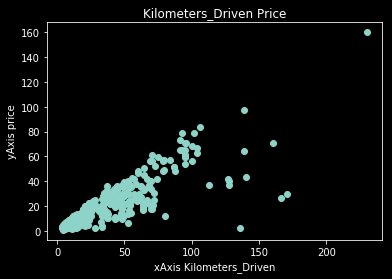

In [62]:
plt.scatter(dataset['Kilometers_Driven'],dataset['Price'])
plt.title('Kilometers_Driven Price')
plt.xlabel('xAxis Kilometers_Driven')
plt.ylabel('yAxis price')
plt.show()

In [63]:
dataset = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')

In [64]:
dataset['Kilometers_Driven'] = dataset['New_Price'].apply(clean_Kilometers_Driven)

TypeError: '>' not supported between instances of 'str' and 'int'

In [65]:
dataset.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [66]:
dataset['Kilometers_Driven'] = dataset['Kilometers_Driven'].apply(clean_Kilometers_Driven)

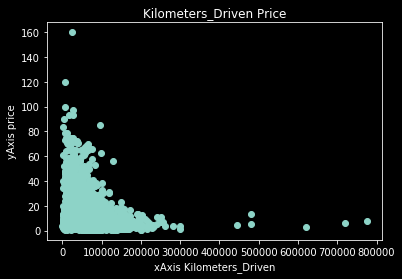

In [67]:
plt.scatter(dataset['Kilometers_Driven'],dataset['Price'])
plt.title('Kilometers_Driven Price')
plt.xlabel('xAxis Kilometers_Driven')
plt.ylabel('yAxis price')
plt.show()

In [68]:
dataset.info

<bound method DataFrame.info of                                                   Name    Location  Year  \
0                               Maruti Wagon R LXI CNG      Mumbai  2010   
1                     Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                         Honda Jazz V     Chennai  2011   
3                                    Maruti Ertiga VDI     Chennai  2012   
4                      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
5                      Hyundai EON LPG Era Plus Option   Hyderabad  2012   
6                               Nissan Micra Diesel XV      Jaipur  2013   
7                    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8                  Volkswagen Vento Diesel Comfortline        Pune  2013   
9                       Tata Indica Vista Quadrajet LS     Chennai  2012   
10                                    Maruti Ciaz Zeta       Kochi  2018   
11                         Honda City 1.5 V AT Sunroof  

In [69]:
dataframe.info

<bound method DataFrame.info of                                                   Name    Location  Year  \
0                               Maruti Wagon R LXI CNG      Mumbai  2010   
1                     Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                         Honda Jazz V     Chennai  2011   
3                                    Maruti Ertiga VDI     Chennai  2012   
4                      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
5                      Hyundai EON LPG Era Plus Option   Hyderabad  2012   
6                               Nissan Micra Diesel XV      Jaipur  2013   
7                    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8                  Volkswagen Vento Diesel Comfortline        Pune  2013   
9                       Tata Indica Vista Quadrajet LS     Chennai  2012   
10                                    Maruti Ciaz Zeta       Kochi  2018   
11                         Honda City 1.5 V AT Sunroof  

In [70]:
dataframe.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [71]:
dataset.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,5977.000000,6019.000000
mean,2013.358199,57669.265825,5.278735,9.479468
std,3.269742,37875.753824,0.808840,11.187917
min,1998.000000,171.000000,0.000000,0.440000
25%,2011.000000,34000.000000,5.000000,3.500000
50%,2014.000000,53000.000000,5.000000,5.640000
75%,2016.000000,73000.000000,5.000000,9.950000
max,2019.000000,775000.000000,10.000000,160.000000


In [72]:
dataset.iloc[:,:-1].values

array([['Maruti Wagon R LXI CNG', 'Mumbai', 2010, ..., '58.16 bhp', 5.0,
        nan],
       ['Hyundai Creta 1.6 CRDi SX Option', 'Pune', 2015, ...,
        '126.2 bhp', 5.0, nan],
       ['Honda Jazz V', 'Chennai', 2011, ..., '88.7 bhp', 5.0,
        '8.61 Lakh'],
       ...,
       ['Mahindra Xylo D4 BSIV', 'Jaipur', 2012, ..., '112 bhp', 8.0,
        nan],
       ['Maruti Wagon R VXI', 'Kolkata', 2013, ..., '67.1 bhp', 5.0, nan],
       ['Chevrolet Beat Diesel', 'Hyderabad', 2011, ..., '57.6 bhp', 5.0,
        nan]], dtype=object)

In [73]:
dataset.iloc[:,:-1]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000.0,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN
6,Nissan Micra Diesel XV,Jaipur,2013,86999.0,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000.0,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430.0,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932.0,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN


In [74]:
type(dataset.iloc[:,:-1])

pandas.core.frame.DataFrame

In [75]:
dataset.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [76]:
dataset.columns.values

array(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'], dtype=object)

In [77]:
dataset.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [78]:
testset.iloc[1:,:]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,NaN
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,NaN
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN
10,Audi Q5 2008-2012 2.0 TDI,Mumbai,2012,78000,Diesel,Automatic,Second,12.8 kmpl,1968 CC,167.6 bhp,5.0,NaN


In [79]:
testset.iloc[:,1:]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
5,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN
6,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,NaN
7,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
8,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,NaN
9,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN


In [80]:
testset.iloc[:,2:0]

""
0
1
2
3
4
5
6
7
8
9


In [81]:
testset.iloc[:,2:]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
5,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN
6,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,NaN
7,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
8,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,NaN
9,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN


In [82]:
testset.iloc[:,1:]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
5,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN
6,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,NaN
7,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
8,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,NaN
9,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')
testframe = pd.read_excel('Participants_Data_Used_Cars/Data_Test.xlsx')

# Cleaning data
def clean_New_Price(val):
    if type(val) is str:
        if ' Cr' in val:
            return float(val.replace(' Cr','')) * 100
        else:
            return float(val.replace(' Lakh',''))
    else:
        return val

def clean_Kilometers_Driven(val):
    if val > 1000000:
        return val / 100
    else:
        return val

def clean_data(data):
    data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
    data['Mileage'] = pd.to_numeric(data['Mileage'].str.replace(' km/kg',''))

    data['Engine'] = pd.to_numeric(data['Engine'].str.replace(' CC',''))
    data['Power'] = pd.to_numeric(data['Power'].str.replace(' bhp',''), errors='coerce')

    data_name['Seats'] = data_name['Seats'].replace(0, np.nan, inplace= True)

    data['New_Price'] = data['New_Price'].apply(clean_New_Price)
    data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(clean_Kilometers_Driven)
    return data

dataset = clean_data(dataframe)
testset = clean_data(testframe)

X = dataset.iloc[:,1:-1]
Y = dataset.loc[:,'Price']

X_test = testset.iloc[:,1:]

# Label encode categories

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Encoding only categorical variables
for col in ['Location','Fuel_Type','Transmission','Owner_Type']:
    # Using whole data to form an exhaustive list of levels
    data=X[col].append(X_test[col])
    le.fit(data.values)
    X[col]=le.transform(X[col])
    X_test[col]=le.transform(X_test[col])






NameError: name 'data_name' is not defined

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')
testframe = pd.read_excel('Participants_Data_Used_Cars/Data_Test.xlsx')

# Cleaning data
def clean_New_Price(val):
    if type(val) is str:
        if ' Cr' in val:
            return float(val.replace(' Cr','')) * 100
        else:
            return float(val.replace(' Lakh',''))
    else:
        return val

def clean_Kilometers_Driven(val):
    if val > 1000000:
        return val / 100
    else:
        return val

def clean_data(data):
    data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
    data['Mileage'] = pd.to_numeric(data['Mileage'].str.replace(' km/kg',''))

    data['Engine'] = pd.to_numeric(data['Engine'].str.replace(' CC',''))
    data['Power'] = pd.to_numeric(data['Power'].str.replace(' bhp',''), errors='coerce')

    data['Seats'] = data['Seats'].replace(0, np.nan, inplace= True)

    data['New_Price'] = data['New_Price'].apply(clean_New_Price)
    data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(clean_Kilometers_Driven)
    return data

dataset = clean_data(dataframe)
testset = clean_data(testframe)

X = dataset.iloc[:,1:-1]
Y = dataset.loc[:,'Price']

X_test = testset.iloc[:,1:]

# Label encode categories

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Encoding only categorical variables
for col in ['Location','Fuel_Type','Transmission','Owner_Type']:
    # Using whole data to form an exhaustive list of levels
    data=X[col].append(X_test[col])
    le.fit(data.values)
    X[col]=le.transform(X[col])
    X_test[col]=le.transform(X_test[col])






In [85]:
dataset.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                 object
New_Price            float64
Price                float64
dtype: object

In [86]:
pd.to_numeric(dataset['Seats'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
5989   NaN
5990   NaN
5991   NaN
5992   NaN
5993   NaN
5994   NaN
5995   NaN
5996   NaN
5997   NaN
5998   NaN
5999   NaN
6000   NaN
6001   NaN
6002   NaN
6003   NaN
6004   NaN
6005   NaN
6006   NaN
6007   NaN
6008   NaN
6009   NaN
6010   NaN
6011   NaN
6012   NaN
6013   NaN
6014   NaN
6015   NaN
6016   NaN
6017   NaN
6018   NaN
Name: Seats, Length: 6019, dtype: float64

In [87]:
dataset['Seats']

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
5989    None
5990    None
5991    None
5992    None
5993    None
5994    None
5995    None
5996    None
5997    None
5998    None
5999    None
6000    None
6001    None
6002    None
6003    None
6004    None
6005    None
6006    None
6007    None
6008    None
6009    None
6010    None
6011    None
6012    None
6013    None
6014    None
6015    None
6016    None
6017    None
6018    None
Name: Seats, Length: 6019, dtype: object

In [88]:
dataframe['Seats']

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
5989    None
5990    None
5991    None
5992    None
5993    None
5994    None
5995    None
5996    None
5997    None
5998    None
5999    None
6000    None
6001    None
6002    None
6003    None
6004    None
6005    None
6006    None
6007    None
6008    None
6009    None
6010    None
6011    None
6012    None
6013    None
6014    None
6015    None
6016    None
6017    None
6018    None
Name: Seats, Length: 6019, dtype: object

In [89]:
dataframe = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')

In [90]:
dataframe['Seats']

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
5       5.0
6       5.0
7       8.0
8       5.0
9       5.0
10      5.0
11      5.0
12      5.0
13      5.0
14      5.0
15      7.0
16      5.0
17      5.0
18      5.0
19      5.0
20      5.0
21      5.0
22      5.0
23      5.0
24      5.0
25      5.0
26      5.0
27      5.0
28      5.0
29      7.0
       ... 
5989    5.0
5990    7.0
5991    5.0
5992    5.0
5993    5.0
5994    5.0
5995    5.0
5996    5.0
5997    5.0
5998    5.0
5999    5.0
6000    5.0
6001    5.0
6002    5.0
6003    5.0
6004    5.0
6005    5.0
6006    5.0
6007    5.0
6008    4.0
6009    5.0
6010    5.0
6011    5.0
6012    7.0
6013    5.0
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 6019, dtype: float64

In [91]:
dataframe.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')
testframe = pd.read_excel('Participants_Data_Used_Cars/Data_Test.xlsx')

# Cleaning data
def clean_New_Price(val):
    if type(val) is str:
        if ' Cr' in val:
            return float(val.replace(' Cr','')) * 100
        else:
            return float(val.replace(' Lakh',''))
    else:
        return val

def clean_Kilometers_Driven(val):
    if val > 1000000:
        return val / 100
    else:
        return val

def clean_data(data):
    data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
    data['Mileage'] = pd.to_numeric(data['Mileage'].str.replace(' km/kg',''))

    data['Engine'] = pd.to_numeric(data['Engine'].str.replace(' CC',''))
    data['Power'] = pd.to_numeric(data['Power'].str.replace(' bhp',''), errors='coerce')

    data['Seats'] = data['Seats'].replace(0, 4, inplace= True)

    data['New_Price'] = data['New_Price'].apply(clean_New_Price)
    data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(clean_Kilometers_Driven)
    return data

dataset = clean_data(dataframe)
testset = clean_data(testframe)

X = dataset.iloc[:,1:-1]
Y = dataset.loc[:,'Price']

X_test = testset.iloc[:,1:]

# Label encode categories

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Encoding only categorical variables
for col in ['Location','Fuel_Type','Transmission','Owner_Type']:
    # Using whole data to form an exhaustive list of levels
    data=X[col].append(X_test[col])
    le.fit(data.values)
    X[col]=le.transform(X[col])
    X_test[col]=le.transform(X_test[col])






In [93]:
data.dtypes

dtype('O')

In [94]:
dataset.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                 object
New_Price            float64
Price                float64
dtype: object

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')
testframe = pd.read_excel('Participants_Data_Used_Cars/Data_Test.xlsx')

# Cleaning data
def clean_New_Price(val):
    if type(val) is str:
        if ' Cr' in val:
            return float(val.replace(' Cr','')) * 100
        else:
            return float(val.replace(' Lakh',''))
    else:
        return val

def clean_Kilometers_Driven(val):
    if val > 1000000:
        return val / 100
    else:
        return val

def clean_data(data):
    data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
    data['Mileage'] = pd.to_numeric(data['Mileage'].str.replace(' km/kg',''))

    data['Engine'] = pd.to_numeric(data['Engine'].str.replace(' CC',''))
    data['Power'] = pd.to_numeric(data['Power'].str.replace(' bhp',''), errors='coerce')

    #data['Seats'] = data['Seats'].replace(0, 4, inplace= True)

    data['New_Price'] = data['New_Price'].apply(clean_New_Price)
    data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(clean_Kilometers_Driven)
    return data

dataset = clean_data(dataframe)
testset = clean_data(testframe)

X = dataset.iloc[:,1:-1]
Y = dataset.loc[:,'Price']

X_test = testset.iloc[:,1:]

# Label encode categories

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Encoding only categorical variables
for col in ['Location','Fuel_Type','Transmission','Owner_Type']:
    # Using whole data to form an exhaustive list of levels
    data=X[col].append(X_test[col])
    le.fit(data.values)
    X[col]=le.transform(X[col])
    X_test[col]=le.transform(X_test[col])






In [96]:
X['Seats'].replace(0,4)

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
5       5.0
6       5.0
7       8.0
8       5.0
9       5.0
10      5.0
11      5.0
12      5.0
13      5.0
14      5.0
15      7.0
16      5.0
17      5.0
18      5.0
19      5.0
20      5.0
21      5.0
22      5.0
23      5.0
24      5.0
25      5.0
26      5.0
27      5.0
28      5.0
29      7.0
       ... 
5989    5.0
5990    7.0
5991    5.0
5992    5.0
5993    5.0
5994    5.0
5995    5.0
5996    5.0
5997    5.0
5998    5.0
5999    5.0
6000    5.0
6001    5.0
6002    5.0
6003    5.0
6004    5.0
6005    5.0
6006    5.0
6007    5.0
6008    4.0
6009    5.0
6010    5.0
6011    5.0
6012    7.0
6013    5.0
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 6019, dtype: float64

In [97]:
X['Seats'] = X['Seats'].replace(0,4)

In [98]:
X.dtypes

Location               int32
Year                   int64
Kilometers_Driven    float64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
dtype: object

In [99]:
X.describe()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6017.000000,5983.000000,5876.000000,5977.000000,824.000000
mean,5.619704,2013.358199,57669.265825,2.363017,0.714238,0.379465,18.134961,1621.276450,113.253050,5.279404,23.075655
std,2.955933,3.269742,37875.753824,1.504939,0.451814,0.818458,4.582289,601.355233,53.874957,0.806121,26.182412
min,0.000000,1998.000000,171.000000,0.000000,0.000000,0.000000,0.000000,72.000000,34.200000,2.000000,3.910000
25%,3.000000,2011.000000,34000.000000,1.000000,0.000000,0.000000,15.170000,1198.000000,75.000000,5.000000,7.977500
50%,6.000000,2014.000000,53000.000000,1.000000,1.000000,0.000000,18.150000,1493.000000,97.700000,5.000000,11.670000
75%,8.000000,2016.000000,73000.000000,4.000000,1.000000,0.000000,21.100000,1984.000000,138.100000,5.000000,26.560000
max,10.000000,2019.000000,775000.000000,4.000000,1.000000,3.000000,33.540000,5998.000000,560.000000,10.000000,230.000000


In [100]:
from sklearn.cross_validation import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size = 0.1, random_state = 0)


ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size = 0.1, random_state = 0)


In [102]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [103]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.values, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [104]:
X_train.isnull().any().any()

True

In [105]:
X_train.isnull().sum().sum()

4866

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')
testframe = pd.read_excel('Participants_Data_Used_Cars/Data_Test.xlsx')

# Cleaning data
def clean_New_Price(val):
    if type(val) is str:
        if ' Cr' in val:
            return float(val.replace(' Cr','')) * 100
        else:
            return float(val.replace(' Lakh',''))
    else:
        return val

def clean_Kilometers_Driven(val):
    if val > 1000000:
        return val / 100
    else:
        return val

def clean_data(data):
    data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
    data['Mileage'] = pd.to_numeric(data['Mileage'].str.replace(' km/kg',''))

    data['Engine'] = pd.to_numeric(data['Engine'].str.replace(' CC',''))
    data['Power'] = pd.to_numeric(data['Power'].str.replace(' bhp',''), errors='coerce')

    #data['Seats'] = data['Seats'].replace(0, 4, inplace= True)

    data['New_Price'] = data['New_Price'].apply(clean_New_Price)
    data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(clean_Kilometers_Driven)
    return data

dataset = clean_data(dataframe)
testset = clean_data(testframe)

X = dataset.iloc[:,1:-1]
Y = dataset.loc[:,'Price']

X_test = testset.iloc[:,1:]

# Label encode categories

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Encoding only categorical variables
for col in ['Location','Fuel_Type','Transmission','Owner_Type']:
    # Using whole data to form an exhaustive list of levels
    data=X[col].append(X_test[col])
    le.fit(data.values)
    X[col]=le.transform(X[col])
    X_test[col]=le.transform(X_test[col])

In [107]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
X = imp.fit_transform(X)

ModuleNotFoundError: No module named 'sklearn.experimental'

In [108]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
X = imp.fit_transform(X)

ModuleNotFoundError: No module named 'sklearn.experimental'

In [109]:
from sklearn.impute import IterativeImputer

ImportError: cannot import name 'IterativeImputer' from 'sklearn.impute' (C:\Users\karthikn\Anaconda3\lib\site-packages\sklearn\impute.py)

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.read_excel('Participants_Data_Used_Cars/Data_Train.xlsx')
testframe = pd.read_excel('Participants_Data_Used_Cars/Data_Test.xlsx')

# Cleaning data
def clean_New_Price(val):
    if type(val) is str:
        if ' Cr' in val:
            return float(val.replace(' Cr','')) * 100
        else:
            return float(val.replace(' Lakh',''))
    else:
        return val

def clean_Kilometers_Driven(val):
    if val > 1000000:
        return val / 100
    else:
        return val

def clean_data(data):
    data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
    data['Mileage'] = pd.to_numeric(data['Mileage'].str.replace(' km/kg',''))

    data['Engine'] = pd.to_numeric(data['Engine'].str.replace(' CC',''))
    data['Power'] = pd.to_numeric(data['Power'].str.replace(' bhp',''), errors='coerce')

    #data['Seats'] = data['Seats'].replace(0, 4, inplace= True)

    data['New_Price'] = data['New_Price'].apply(clean_New_Price)
    data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(clean_Kilometers_Driven)
    return data

dataset = clean_data(dataframe)
testset = clean_data(testframe)

X = dataset.iloc[:,1:-2]
Y = dataset.loc[:,'Price']

X_test = testset.iloc[:,1:-1]

# Label encode categories

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Encoding only categorical variables
for col in ['Location','Fuel_Type','Transmission','Owner_Type']:
    # Using whole data to form an exhaustive list of levels
    data=X[col].append(X_test[col])
    le.fit(data.values)
    X[col]=le.transform(X[col])
    X_test[col]=le.transform(X_test[col])



In [111]:
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size = 0.1, random_state = 0)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.values, Y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [112]:
X.isnull().any().any()

True

In [113]:
X[X.isnull().any(axis=1)]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
76,6,2008,111111.0,1,1,0,17.80,1399.0,NaN,5.0
79,5,2005,87591.0,4,1,0,0.00,1086.0,NaN,5.0
89,5,2007,73745.0,4,1,0,17.00,1086.0,NaN,5.0
120,9,2005,102000.0,4,1,2,17.00,1086.0,NaN,5.0
143,7,2008,80759.0,4,1,3,17.00,1086.0,NaN,5.0
194,0,2007,60006.0,4,1,0,0.00,NaN,NaN,NaN
208,8,2010,42001.0,4,1,0,16.10,NaN,NaN,NaN
227,4,2013,47000.0,1,1,0,17.80,1248.0,NaN,5.0
229,1,2015,70436.0,1,1,0,0.00,1498.0,99.0,NaN
245,9,2007,72000.0,4,1,3,17.00,1086.0,NaN,5.0


In [114]:
tmpIdx = X[X.isnull().any(axis=1)].index

In [115]:
X[tmpIdx]

KeyError: "Int64Index([  76,   79,   89,  120,  143,  194,  208,  227,  229,  245,\n            ...\n            5533, 5647, 5755, 5759, 5861, 5873, 5893, 5925, 5943, 5985],\n           dtype='int64', length=147) not in index"

In [116]:
X.iloc[tmpIdx]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
76,6,2008,111111.0,1,1,0,17.80,1399.0,NaN,5.0
79,5,2005,87591.0,4,1,0,0.00,1086.0,NaN,5.0
89,5,2007,73745.0,4,1,0,17.00,1086.0,NaN,5.0
120,9,2005,102000.0,4,1,2,17.00,1086.0,NaN,5.0
143,7,2008,80759.0,4,1,3,17.00,1086.0,NaN,5.0
194,0,2007,60006.0,4,1,0,0.00,NaN,NaN,NaN
208,8,2010,42001.0,4,1,0,16.10,NaN,NaN,NaN
227,4,2013,47000.0,1,1,0,17.80,1248.0,NaN,5.0
229,1,2015,70436.0,1,1,0,0.00,1498.0,99.0,NaN
245,9,2007,72000.0,4,1,3,17.00,1086.0,NaN,5.0


In [117]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)

In [118]:
X.iloc[tmpIdx]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [119]:
X[tmpIdx]

array([[6.0000000e+00, 2.0080000e+03, 1.1111100e+05, ..., 1.3990000e+03,
        1.1325305e+02, 5.0000000e+00],
       [5.0000000e+00, 2.0050000e+03, 8.7591000e+04, ..., 1.0860000e+03,
        1.1325305e+02, 5.0000000e+00],
       [5.0000000e+00, 2.0070000e+03, 7.3745000e+04, ..., 1.0860000e+03,
        1.1325305e+02, 5.0000000e+00],
       ...,
       [1.0000000e+01, 2.0100000e+03, 8.5000000e+04, ..., 1.7980000e+03,
        1.1325305e+02, 5.0000000e+00],
       [2.0000000e+00, 2.0020000e+03, 7.5000000e+04, ..., 2.1120000e+03,
        1.1325305e+02, 6.0000000e+00],
       [4.0000000e+00, 2.0130000e+03, 7.0000000e+04, ..., 1.3640000e+03,
        1.1325305e+02, 5.0000000e+00]])

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size = 0.1, random_state = 0)


In [121]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.values, Y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [122]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [123]:
Y_pred = regressor.predict(X_validate)

In [124]:
df = pd.DataFrame({'Actual': Y_validate, 'Predicted': Y_pred})  

In [125]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validate, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_validate, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validate, Y_pred))) 

Mean Absolute Error: 3.5243037731237763
Mean Squared Error: 29.836905687074353
Root Mean Squared Error: 5.46231687904266


In [126]:
X_test = imp.fit_transform(X_test)

In [127]:
Y_test = regressor.predict(X_test)

In [128]:
type(Y_test)

numpy.ndarray

In [129]:
result_df = pd.DataFrame(Y_test)

## save to xlsx file
filepath = 'results.xlsx'
result_df.to_excel(filepath, index=False)

In [130]:
result_df = pd.DataFrame({'Price':Y_test})

## save to xlsx file
filepath = 'results.xlsx'
result_df.to_excel(filepath, index=False)


PermissionError: [Errno 13] Permission denied: 'results.xlsx'

In [131]:
result_df = pd.DataFrame({'Price':Y_test})

## save to xlsx file
filepath = 'results.xlsx'
result_df.to_excel(filepath, index=False)


In [132]:
print('Root Mean Squared log Error:', np.sqrt(metrics.mean_squared_log_error(Y_validate, Y_pred))) 

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [133]:
dataframe['New_Price'].count()

824

In [134]:
dataframe['New_Price'].count()/len(dataframe)

0.1368998172453896